In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


path = pd.read_csv("exams.csv")
path_copy = path.copy()



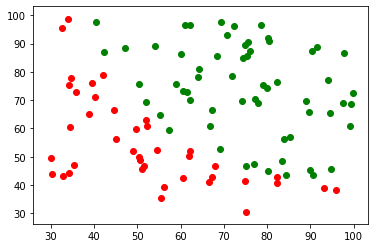

In [2]:
exam_1_admitted = path[path['admitted']==1]['exam_1']
exam_2_admitted = path[path['admitted']==1]['exam_2']
exam_1_not_admitted = path[path['admitted']==0]['exam_1']
exam_2_not_admitted = path[path['admitted']==0]['exam_2']

plt.scatter(exam_1_admitted, exam_2_admitted, color="green")
plt.scatter(exam_1_not_admitted, exam_2_not_admitted, color="red")

In [8]:
#minmax normalization
path['exam_1'] = (path['exam_1']-path['exam_1'].min())/(path['exam_1'].max()-path['exam_1'].min())
path['exam_2'] = (path['exam_2']-path['exam_2'].min())/(path['exam_2'].max()-path['exam_2'].min())

x = path[['exam_1', 'exam_2']].values
y = path['admitted'].values
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunction(h, y):
    return (-y * np.log(h)-(1-y)*np.log(1-h)).mean()

def probabilityPred (x, theta):
    return sigmoid(np.dot(x, theta))

def pred(x, theta, threshold = 0.5):
    probability = probabilityPred(x, theta)
    probability[probability>=0.5] = 1
    probability[probability<0.5] = 0
    return probability

intercept = np.ones((x.shape[0], 1))

x = np.concatenate((intercept, x), axis = 1)
theta = np.zeros(x.shape[1])
learning_rate = 0.01
numIterations = 100000


cost = []
for i in range(numIterations):
    z = np.dot(x, theta)
    h = sigmoid(z)
    gradient = np.dot(x.T, (h-y))/ y.size
    theta -= learning_rate*gradient
    if i %1000 == 0: print(costFunction(h, y))
    cost.append(costFunction(h, y))



0.6931471805599453
0.5908778825379103
0.5448305466419672
0.5074938468946265
0.4768878101925975
0.45150408980588247
0.4301990908090169
0.4121107665725063
0.39658771701610085
0.38313421082464416
0.37136936482059973
0.3609973996820092
0.35178608834264985
0.3435511134665674
0.33614464686247103
0.3294469429539564
0.32336009278123085
0.31780333736092314
0.3127095159807164
0.3080223481186337
0.3036943334877349
0.29968511477637505
0.29596018997599843
0.2924898912359267
0.2892485686963153
0.2862139332848076
0.2833665237784718
0.2806892717472795
0.2781671441566069
0.27578684800944137
0.27353658487557575
0.2714058457858185
0.26938523898041555
0.26746634454931095
0.2656415912021355
0.2639041513422584
0.26224785135440043
0.2606670945959111
0.2591567950429646
0.25771231991122356
0.2563294398661752
0.25500428567691524
0.25373331036055785
0.252513256021988
0.25134112472255055
0.2502141528171634
0.24912978828669594
0.24808567066480933
0.2470796132186056
0.24610958709262779
0.24517370716777723
0.2442702

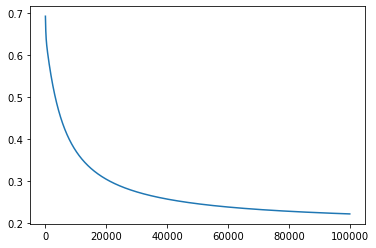

In [4]:
plt.plot(range(len(cost)), cost)

[0.0, 1.0]
[ 0.93375888 -0.13246154]


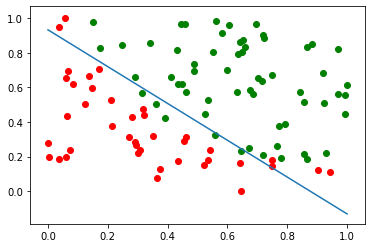

In [5]:
e1a = path[path['admitted']==1]['exam_1']
e2a = path[path['admitted']==1]['exam_2']
e1n = path[path['admitted']==0]['exam_1']
e2n = path[path['admitted']==0]['exam_2']
plt.scatter(e1a, e2a, color="green")
plt.scatter(e1n, e2n, color="red")

x_values =  [np.min(path['exam_1']), np.max(path['exam_1'])]
print(x_values)
y_values = - (theta[0] + np.dot(theta[1], x_values))/theta[2]
print(y_values)
plt.plot(x_values, y_values)

In [6]:
#test
preds = pred(x, theta)
print('Prediction on train data')
print(preds)
print('Actual values')
print(y)
print('Accuracy')
print(accuracy_score(y, preds))

Prediction on train data
[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]
Actual values
[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]
Accuracy
0.89


In [7]:
#testing data not in dataset
#test1
testX_1 = np.array([55, 70])
testY_1 = 1

#test2
testX_2 = np.array ([40, 60])
testY_2 = 0

testX_1 = (testX_1 - path_copy['exam_1'].min())/(path_copy['exam_1'].max() - path_copy['exam_1'].min())
testX_1 = np.insert(testX_1, 0, 1.0)

testX_2 = (testX_2 - path_copy['exam_1'].min())/(path_copy['exam_1'].max() - path_copy['exam_1'].min())
testX_2 = np.insert(testX_2, 0, 1.0)

print('Test 1 prediction:')
print(probabilityPred(testX_1, theta))
print('Test 2 prediction:')
print(probabilityPred(testX_2, theta))

Test 1 prediction:
0.5434423607787654
Test 2 prediction:
0.04344999213011968
